In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\DELL PC\Desktop\ML\DL\useful_data\Telco-Customer-Churn.csv')
df.sample(6)

# customer churn--> percentage of customer that stopped using your company's product or service

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3780,1335-MXCSE,Male,0,Yes,Yes,55,Yes,No,DSL,No,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),55.25,3119.9,No
588,0742-LAFQK,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,Yes,Two year,Yes,Electronic check,99.15,7422.1,No
6707,2452-MRMZF,Female,1,Yes,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.70,1937.4,No
1503,0481-SUMCB,Female,1,No,No,45,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),102.15,4735.35,No
4075,3160-TYXLT,Male,0,No,No,53,No,No phone service,DSL,Yes,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),46.30,2546.85,No
4269,9170-CCKOU,Male,0,Yes,No,17,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card (automatic),90.20,1454.15,Yes


In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes  # here total charges is string! weird . we have to convert it to numeric form

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values    #Series.values -->convert series to 1D-array

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [7]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

# errors='coerce' --> if a value found that cannot be converted to numeric form then consider it as nan

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.shape

(7043, 20)

In [10]:
df1=df[df.TotalCharges!=' ']
df1.shape     # dropping those 11 rows

(7032, 20)

In [11]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\DELL PC\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
df1.TotalCharges.dtypes

dtype('float64')

In [13]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

#tenure -> how long the customer is attached to company (how loyal he is!)

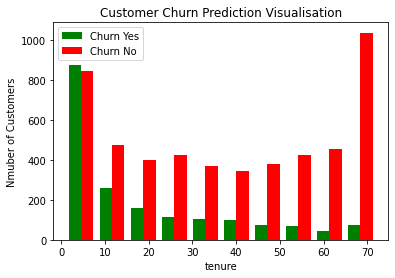

In [14]:
plt.xlabel('tenure')
plt.ylabel('Nmuber of Customers')
plt.title('Customer Churn Prediction Visualisation')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn Yes','Churn No'])
plt.legend()

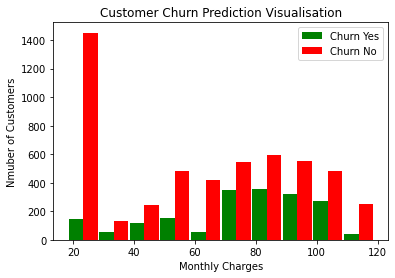

In [15]:
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Nmuber of Customers')
plt.title('Customer Churn Prediction Visualisation')
plt.hist([mc_churn_yes,mc_churn_no],rwidth=.95,color=['green','red'],label=['Churn Yes','Churn No'])
plt.legend()

In [16]:
def print_unique_col_values(df):
    for column in df1:
        if df1[column].dtypes=='object':
            print(f'{column}:          {df1[column].unique()}')

In [17]:
print_unique_col_values(df1)

gender:          ['Female' 'Male']
Partner:          ['Yes' 'No']
Dependents:          ['No' 'Yes']
PhoneService:          ['No' 'Yes']
MultipleLines:          ['No phone service' 'No' 'Yes']
InternetService:          ['DSL' 'Fiber optic' 'No']
OnlineSecurity:          ['No' 'Yes' 'No internet service']
OnlineBackup:          ['Yes' 'No' 'No internet service']
DeviceProtection:          ['No' 'Yes' 'No internet service']
TechSupport:          ['No' 'Yes' 'No internet service']
StreamingTV:          ['No' 'Yes' 'No internet service']
StreamingMovies:          ['No' 'Yes' 'No internet service']
Contract:          ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:          ['Yes' 'No']
PaymentMethod:          ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:          ['No' 'Yes']


In [18]:
df1.replace('No internet service','No',inplace=True) #inplace=True ->update the actual df1
df1.replace('No phone service','No',inplace=True)


C:\Users\DELL PC\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [19]:
print_unique_col_values(df1)

gender:          ['Female' 'Male']
Partner:          ['Yes' 'No']
Dependents:          ['No' 'Yes']
PhoneService:          ['No' 'Yes']
MultipleLines:          ['No' 'Yes']
InternetService:          ['DSL' 'Fiber optic' 'No']
OnlineSecurity:          ['No' 'Yes']
OnlineBackup:          ['Yes' 'No']
DeviceProtection:          ['No' 'Yes']
TechSupport:          ['No' 'Yes']
StreamingTV:          ['No' 'Yes']
StreamingMovies:          ['No' 'Yes']
Contract:          ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:          ['Yes' 'No']
PaymentMethod:          ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:          ['No' 'Yes']


In [20]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\DELL PC\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [21]:
for col in df1:
    print(f'{col}:   {df1[col].unique()}')

gender:   ['Female' 'Male']
SeniorCitizen:   [0 1]
Partner:   [1 0]
Dependents:   [0 1]
tenure:   [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:   [0 1]
MultipleLines:   [0 1]
InternetService:   ['DSL' 'Fiber optic' 'No']
OnlineSecurity:   [0 1]
OnlineBackup:   [1 0]
DeviceProtection:   [0 1]
TechSupport:   [0 1]
StreamingTV:   [0 1]
StreamingMovies:   [0 1]
Contract:   ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:   [1 0]
PaymentMethod:   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:   [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:   [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:   [0 1]


In [22]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [23]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [24]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [25]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [26]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2248,0,0,1,1,30,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0
6510,1,0,1,1,46,1,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4371,0,0,1,1,13,1,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2451,0,0,1,1,28,1,1,1,1,0,...,0,1,0,0,1,0,0,0,1,0


In [27]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler                          # scaling ...
scaler=MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [28]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3835,1,0,1,1,0.323944,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1448,0,0,0,0,0.309859,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4217,0,1,1,0,0.183099,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1256,1,0,1,1,1.000000,1,1,1,0,1,...,1,0,0,0,0,1,0,1,0,0


In [29]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=58)

In [30]:
X_train.shape

(4922, 26)

In [31]:
X_test.shape

(2110, 26)

In [32]:
len(X_train.columns)

26

In [33]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',   #binary_crossentropy as our output is binary ->0,1
    metrics=['accuracy']
)
# Dense(no of hidden layers,input layer)


# we take input as (26,) as we've 26 features & we r giving 26 features as input

In [34]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
154/154 [==============================] - 3s 2ms/step - loss: 0.4801 - accuracy: 0.7651
Epoch 2/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4404 - accuracy: 0.7883
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.7918
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.7942
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.7974
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.8011
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8013
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8007
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.8027
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4214 - accura

In [35]:
model.evaluate(X_test,y_test)

66/66 [==============================] - 1s 2ms/step - loss: 0.4128 - accuracy: 0.7986


[0.41280460357666016, 0.7985782027244568]

In [36]:
yp=model.predict(X_test)
yp   # 2D array

array([[0.6795731 ],
       [0.36615914],
       [0.06507581],
       ...,
       [0.00490335],
       [0.05456749],
       [0.05664164]], dtype=float32)

In [37]:
y_pred=[]       # here we r converting 2D array to 1D array with values 0 and 1 only
for element in yp:
    if element>.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1527
           1       0.70      0.48      0.57       583

    accuracy                           0.80      2110
   macro avg       0.76      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



Text(69.0, 0.5, 'Truth')

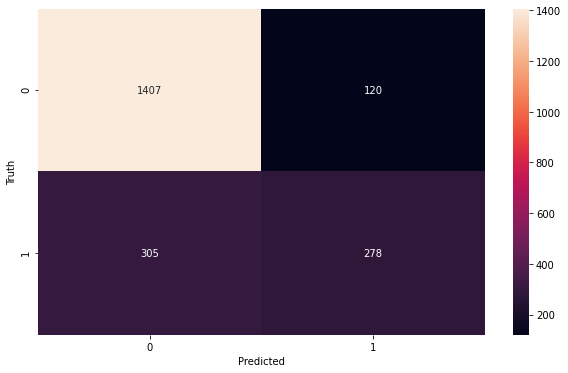

In [39]:
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# main diagonal is our correct prediction

In [40]:
accuracy=(1380+310)/(1380+310+273+147)
round(accuracy,2)               #   <---------- accuracy of model

0.8

In [41]:
round(1380/(1380+147),2)    #  <------- recall for class 0

0.9

In [42]:
round(310/(273+310),2)  #  <------- recall for class 1

0.53

In [43]:
round(1380/(1380+273),2)    #  <------- precision for class 0
# precision : how much our model is precise(accurate) to predict 0 as 0

0.83

In [44]:
round(310/(147+310),2)      #  <------- precision for class 1

0.68

In [ ]:
# -------------------------------      handling the imbalanced datasets

In [45]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [46]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
154/154 [==============================] - 1s 2ms/step - loss: 0.5093 - accuracy: 0.7523
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.7875
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.7942
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.7970
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8021
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.8043
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8060
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8060
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8066
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4139 - accura

In [47]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1527
           1       0.65      0.59      0.62       583

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.79      0.80      0.80      2110



In [48]:
y_test.value_counts()
# 1-->customer has churned

0    1527
1     583
Name: Churn, dtype: int64

In [49]:
#--------------------------------undersampling


# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [50]:
df_class_0.shape,df_class_1.shape

((5163, 27), (1869, 27))

In [51]:
count_class_0,count_class_1

(5163, 1869)

In [52]:
df_class_0_under=df_class_0.sample(count_class_1)

df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)

print('Random Under-Sampling: ')
print(df_test_under.Churn.value_counts())

Random Under-Sampling: 
0    1869
1    1869
Name: Churn, dtype: int64


In [53]:
X=df_test_under.drop('Churn',axis='columns')
y=df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

#stratify=y :equal no of samples of each class in X_train, X_test, y_train, y_test

In [54]:
y_train.value_counts()  #equal no of sample due to 'stratify' argument

0    1495
1    1495
Name: Churn, dtype: int64

In [55]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6290 - accuracy: 0.6629
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5249 - accuracy: 0.7498
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7605
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.7599
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7622
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7666
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7632
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7649
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.7662
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.7645
Epoch 11/

In [56]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       374
           1       0.71      0.79      0.75       374

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.73       748
weighted avg       0.74      0.74      0.73       748



In [57]:
#-------------------------oversampling

count_class_0,count_class_1

(5163, 1869)

In [58]:
df_class_1.shape

(1869, 27)

In [59]:
df_class_1.sample(200).shape

(200, 27)

In [60]:
df_class_1.sample(2000,replace=True).shape

(2000, 27)

In [61]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)

df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)
print('Random over-Sapmling:  ')
print(df_test_over.Churn.value_counts())

Random over-Sapmling:  
0    5163
1    5163
Name: Churn, dtype: int64


In [62]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [63]:
y_train.value_counts() #has equal samples of each class

0    4130
1    4130
Name: Churn, dtype: int64

In [64]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5466 - accuracy: 0.7226
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.7614
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7656
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7669
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7696
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7708
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7719
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.7723
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7740
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4687 - accura

In [65]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1033
           1       0.78      0.82      0.80      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



In [66]:
#  method 3) SMOTE

In [67]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [68]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [73]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [75]:
y_train.value_counts()   # same no of samples

0    4130
1    4130
Name: Churn, dtype: int64

In [76]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 5s 3ms/step - loss: 0.5314 - accuracy: 0.7396
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4696 - accuracy: 0.7803
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4584 - accuracy: 0.7867
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4525 - accuracy: 0.7907
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.7914
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4413 - accuracy: 0.7976
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.7985
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4338 - accuracy: 0.8011
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4297 - accuracy: 0.8029
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4262 - accura

In [78]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1033
           1       0.77      0.85      0.81      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



In [79]:
# method 4)     --  --use of ensemble with undersampling


df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [80]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [82]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [83]:
4130/1495  #--- approx 3:1

2.762541806020067

In [84]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [85]:
df3_class0=df3[df3.Churn==0]
df3_class1=df3[df3.Churn==1]

In [86]:
df3_class0.shape,df3_class1.shape

((4130, 27), (1495, 27))

In [90]:
# df_train=pd.concat([df3_class0[:1495],df3_class1],axis=0)
# df_train.shape


def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [91]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 2ms/step - loss: 0.6259 - accuracy: 0.6759
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5157 - accuracy: 0.7572
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4975 - accuracy: 0.7649
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4916 - accuracy: 0.7645
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4853 - accuracy: 0.7696
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.7746
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.7709
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4745 - accuracy: 0.7742
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4728 - accuracy: 0.7722
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4704 - accuracy: 0.7732
Epoch 11/

In [92]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 2ms/step - loss: 0.6370 - accuracy: 0.6605
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.7488
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7612
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4909 - accuracy: 0.7642
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7659
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7672
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7689
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4749 - accuracy: 0.7669
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7706
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4705 - accuracy: 0.7739
Epoch 11/

In [93]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 9s 2ms/step - loss: 0.6338 - accuracy: 0.6490
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.7533
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4997 - accuracy: 0.7586
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7681
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7712
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7746
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.7806
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7806
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.7818
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.7829
Epoch 11/

In [ ]:
vote1=0
vote2=0
vote3=1

vote1+vote2+vote3 -->1
for anything > 1,the majority vote is 1

In [96]:
len(y_pred1),len(y_pred2),len(y_pred3)

(1407, 1407, 1407)

In [97]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [98]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.78      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407

